### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [3]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)] 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
alumnos = pd.DataFrame(lista_alumnos, columns=['Nombre', 'Edad', 'Altura'])
print(alumnos)

                     Nombre  Edad  Altura
0                 Caranchoa    24    1.82
1                 Leo Messi    25    1.71
2                  El bicho    35    1.66
3                 Paquirrin    37    1.63
4                John Cobra    29    1.90
5                 El tomate    27    1.80
6        El chucky de cieza    28    1.70
7    Chiquito de la Calzada    32    1.60
8                  El cuñao    36    1.74
9                Rafa Nadal    45    1.72
10                Pau Gasol    41    1.65
11  El hermano de Pau Gasol    30    1.65
12                 Joselito    40    1.60
13             Maria Isabel    39    1.80
14                   Melody    23    1.77
15              Las ketchup    32    1.75
16                   Pumuki    27    1.70
17                Naranjito    34    1.80
18                 Espinete    27    1.77
19                  El Feli    28    1.70
20                Jose Luis    35    1.80


In [22]:
# Muestra la info
alumnos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [23]:
# Muestra los estadísticos del df
alumnos.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


In [24]:
alumnos.head()

,Nombre,Edad,Altura
0,Caranchoa,24,1.82
1,Leo Messi,25,1.71
2,El bicho,35,1.66
3,Paquirrin,37,1.63
4,John Cobra,29,1.90


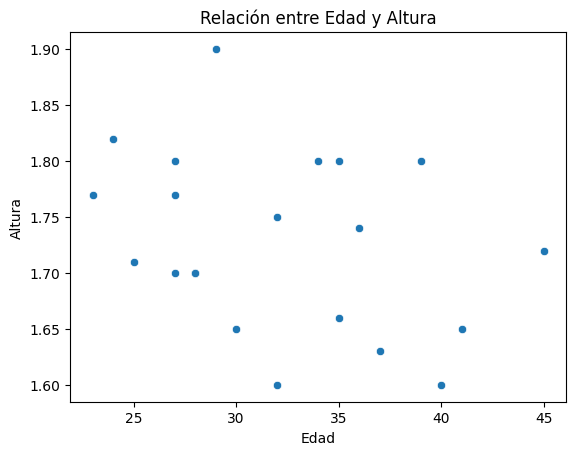

In [28]:
# Genera un scatter plot con Edad y Altura
sns.scatterplot(x='Edad', y='Altura', data=alumnos)
plt.title("Relación entre Edad y Altura")
plt.xlabel("Edad")
plt.ylabel("Altura")
plt.show()


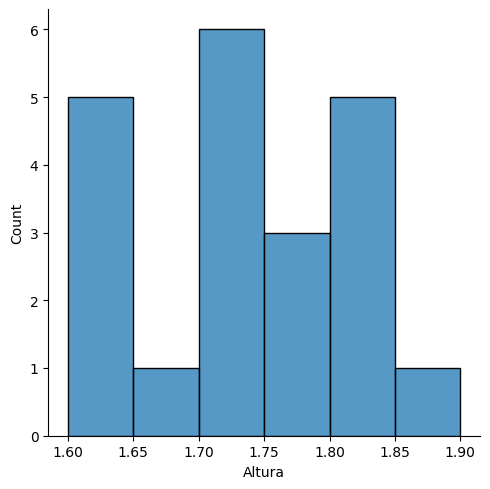

In [32]:
# Genera un heatmap
sns.displot(alumnos['Altura'])


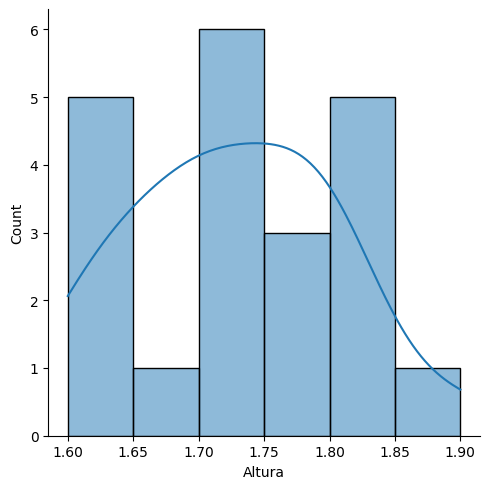

In [33]:
# Genera un distplot
sns.displot(alumnos['Altura'], kde=True)

In [49]:
# Divide el df en features (X) y target (y)
x = alumnos[["Edad"]]
y = alumnos["Altura"]

In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [52]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Tamaño x:", x.shape)
print("Tamaño x_train:", x_train.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño x_test:", x_test.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño x: (21, 1)
Tamaño x_train: (14, 1)
Tamaño y_train: (14,)
Tamaño x_test: (7, 1)
Tamaño y_test: (7,)


In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
# Instancia y entrena un regresor lineal
lm= LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [58]:
# imprime el intercepto y el coeficiente
print(lm.intercept_, lm.coef_)

1.8520906282183311 [-0.00414006]


(Altura) = 1.85 - 0.0041*(Edad)

In [67]:
# Realiza una predicción con el conjunto de test
prediccion = lm.predict(x_test)
prediccion


array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [66]:
# Crea un df con el conjunto de test
df_test = pd.DataFrame(x_test)
df_test

,Edad
0,24
17,34
15,32
1,25
8,36
5,27
11,30


In [68]:
# Añade una columna con la predicción
df_test["predict_height"] = prediccion
df_test

,Edad,predict_height
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [72]:
# Añade una columna con la altura real
df_test["real_height"] = alumnos["Altura"]
df_test

,Edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


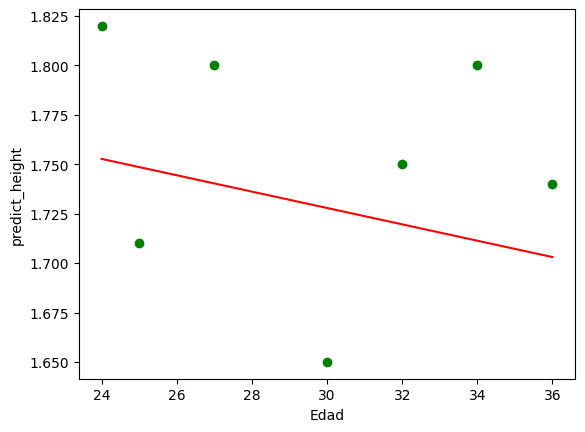

In [86]:
plt.scatter(x=df_test["Edad"], y=df_test["real_height"], color="green", marker="o")
sns.lineplot(x=df_test["Edad"], y=df_test["predict_height"], color="red", linestyle="-");


In [89]:
# Muestra el score del módelo
lm.score(x_test, y_test)

-0.1974201563564395

In [91]:
from sklearn import metrics

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [100]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
print('MAE:', metrics.mean_absolute_error(y_test, prediccion))
print('MSE:', metrics.mean_squared_error(y_test, prediccion))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))


MAE: 0.057064881565396686
MSE: 0.003685121624052069
RMSE: 0.06070520261107831


In [93]:
# Muestra el Mean Absolute Percentage Error
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, prediccion))

MAPE: 0.032537242071442034


In [101]:
# Muestra cual sería la predicción para 85 años de edad
prediccion85 = np.array([[85]])
prediccion2

lm.predict(prediccion85)



/opt/miniconda3/envs/da_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.50018538])

In [128]:
# Valores reales y predichos
y_real = np.array([1.82, 1.80, 1.75, 1.71, 1.74, 1.80, 1.65])
y_pred = np.array([1.75, 1.71, 1.72, 1.75, 1.70, 1.74, 1.73])

#MAE
MAE =sum(np.abs(df_test["predict_height"] - df_test["real_height"]))/len(df_test["predict_height"]) # MAE
print('MAE:', MAE)

#MSE
mse = np.mean((y_real - y_pred) ** 2)

#RMSE
rmse = np.sqrt(mse)

#MAPE
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# Imprimir resultados
print(f"MAE: {MAE}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


MAE: 0.057064881565396686
MAE: 0.057064881565396686
MSE: 0.003871428571428578
RMSE: 0.06222080497252168
MAPE: 3.340041371931445


In [117]:
# Añade una columna con el error
df_test['error'] = abs(df_test['real_height'] - df_test['predict_height'])

print(df_test)


    Edad  predict_height  real_height     error  error_cuadratico
0     24        1.752729         1.82  0.067271          0.004525
17    34        1.711329         1.80  0.088671          0.007863
15    32        1.719609         1.75  0.030391          0.000924
1     25        1.748589         1.71  0.038589          0.001489
8     36        1.703048         1.74  0.036952          0.001365
5     27        1.740309         1.80  0.059691          0.003563
11    30        1.727889         1.65  0.077889          0.006067


In [130]:
# Muestra el error medio
print(MAE)

0.057064881565396686


In [120]:
# Añade una columna que contenga el error cuadrático
df_test['error_cuadratico'] = (df_test['real_height'] - df_test['predict_height']) ** 2
df_test


,Edad,predict_height,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [131]:
# Muestra el error cuadrático medio
df_test['error_cuadratico'].mean()

np.float64(0.003685121624052069)

In [134]:
rmse = np.sqrt(mse)
print(rmse)


0.06222080497252168


In [135]:
# Muestra la raíz del error cuadrático medio
rmse = np.sqrt(mse)
print(rmse)

0.06222080497252168


In [138]:
# Calcular el MAPE
mape = (abs(df_test['real_height'] - df_test['predict_height']) / df_test['real_height']).mean() 
print(mape)


0.032537242071442034
